In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

In [4]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Raw Data

In [5]:
data = pd.read_csv('./data/2017.csv')

## Formatting

In [6]:
data['Call Received'] = pd.to_datetime(data['Call Received'])

In [ ]:
#data.info()

In [7]:
#rename
data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitiude':'long','Mapped Location':'map_loc'}, axis=1)

In [8]:
data['month'] = pd.DatetimeIndex(data['call_re']).month
data['day'] = pd.DatetimeIndex(data['call_re']).day

In [9]:
#to avoid having to recreate and reload info
data = data.to_csv('./data/df_2017_formatted.csv', index = False)

## Load Formatted Data

In [10]:
data = pd.read_csv('./data/df_2017_formatted.csv')

In [11]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Stats

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105383 entries, 0 to 1105382
Data columns (total 21 columns):
event_num       1105383 non-null object
call_re         1105383 non-null datetime64[ns]
comp_num        1105383 non-null int64
shift           1055783 non-null object
tc              1105383 non-null int64
tc_desc         1105383 non-null object
tc_suff         611889 non-null object
tc_suff_desc    590693 non-null object
disp_code       1105383 non-null int64
disp_desc       1093786 non-null object
block           1064959 non-null float64
st_name         1105372 non-null object
unit_disp       1046203 non-null object
sect            1054924 non-null object
zone            1054924 non-null float64
rpa             1063066 non-null float64
lat             1059168 non-null float64
Longitude       1059168 non-null float64
map_loc         1059168 non-null object
month           1105383 non-null int64
day             1105383 non-null int64
dtypes: datetime64[ns](1), float64(5), in

## Worst Days & Weeks

Text(0, 0.5, 'Number of Incidents')

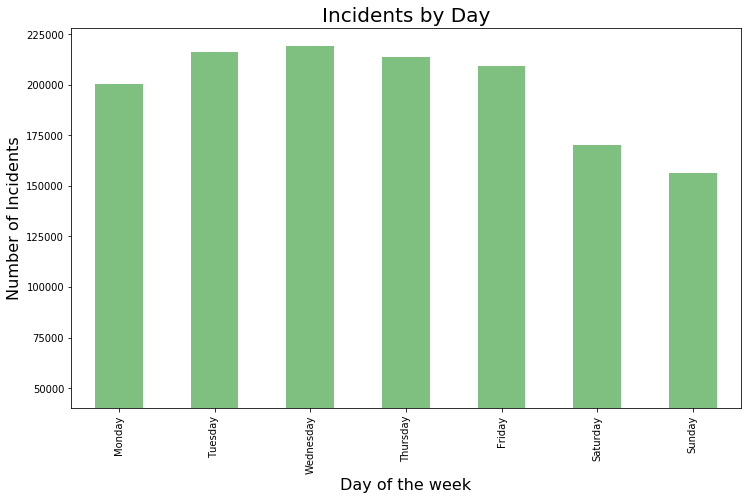

In [13]:
# Number of scooter per day of the week
day_incidents = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

In [14]:
# Number of scooter per day of the week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     20927
2     22024
3     20718
4     24195
5     22898
6     21910
7     22159
8     21508
9     21484
10    21390
11    18890
12    21811
13    20483
14    21121
15    22975
16    22455
17    23121
18    21772
19    20628
20    20999
21    21568
22    21093
23    20650
24    20830
25    21762
26    22807
27    22248
28    22302
29    21462
30    22281
31    21054
32    21929
33    22098
34    20497
35    21537
36    22023
37    20404
38    21051
39    20500
40    20489
41    19747
42    20752
43    20824
44    21010
45    20213
46    20753
47    19480
48    20652
49    20084
50    21185
51    20055
52    18575
Name: call_re, dtype: int64


In [15]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [16]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,20927
2,2,22024
3,3,20718
4,4,24195
5,5,22898
6,6,21910
7,7,22159
8,8,21508
9,9,21484
10,10,21390


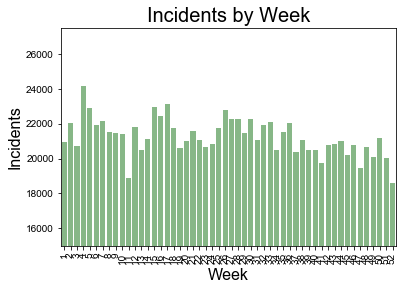

In [17]:
plt.ylim(15000, 27500)

g = sns.barplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(50,50)})
plt.title("Incidents by Week", fontsize = 20)
plt.xlabel("Week", fontsize = 16)
plt.ylabel("Incidents", fontsize = 16)
plt.show()

Text(0, 0.5, 'Number of Incidents')

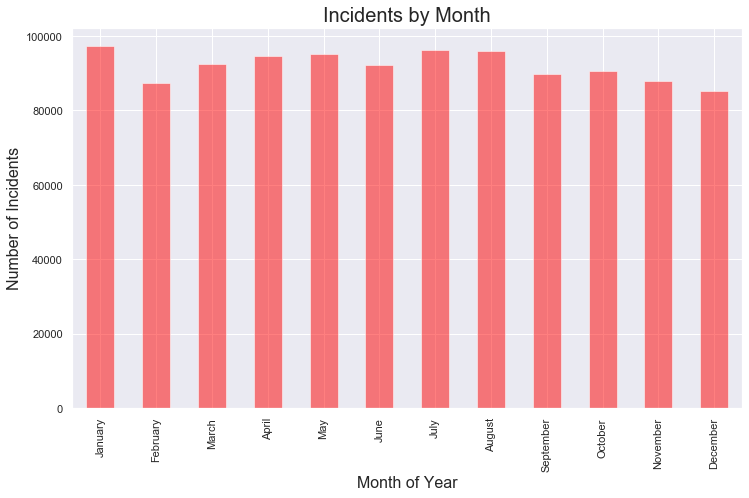

In [19]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Worst Day of Week = Wednesday 
\ Worst Week of Year = 1 
\ Worst Month of Year = January 

## Incidents Reported

In [20]:
inc_ct = data.tc_desc.value_counts()

In [21]:
inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [22]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

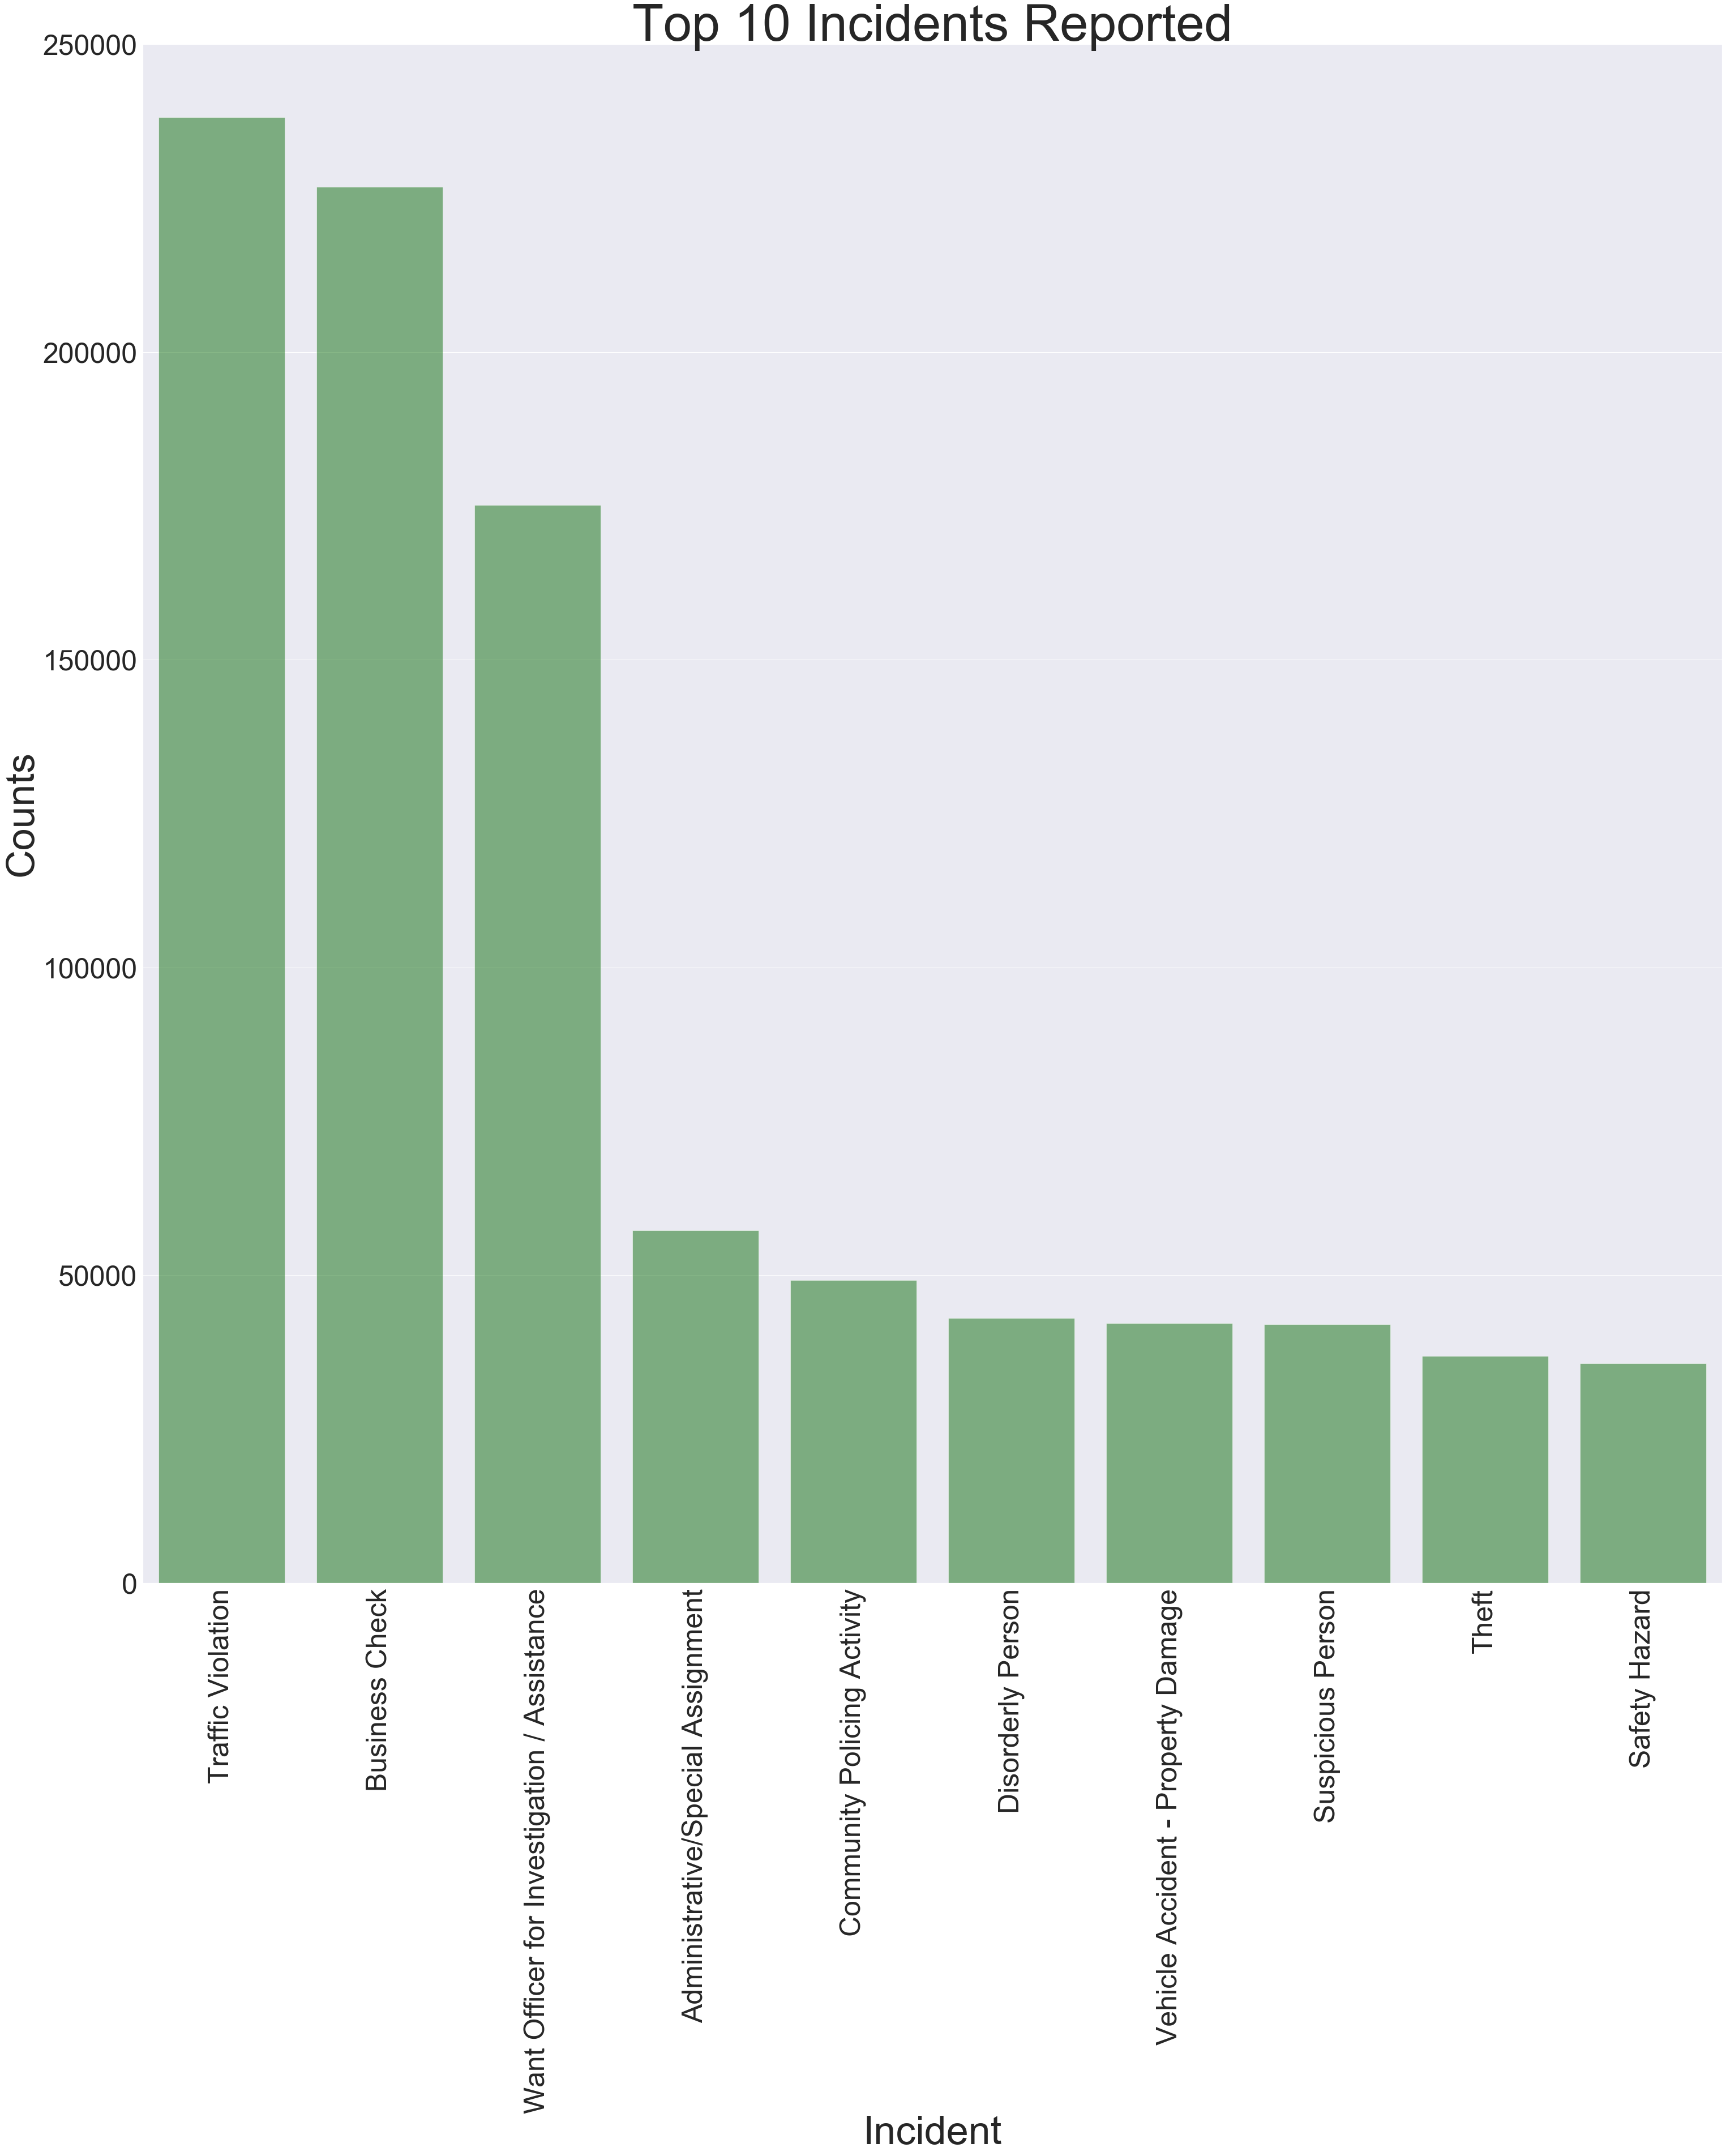

In [23]:

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [24]:
# Smallest x number of incidents

s25 = inc_cts.nsmallest(10,['Count'])

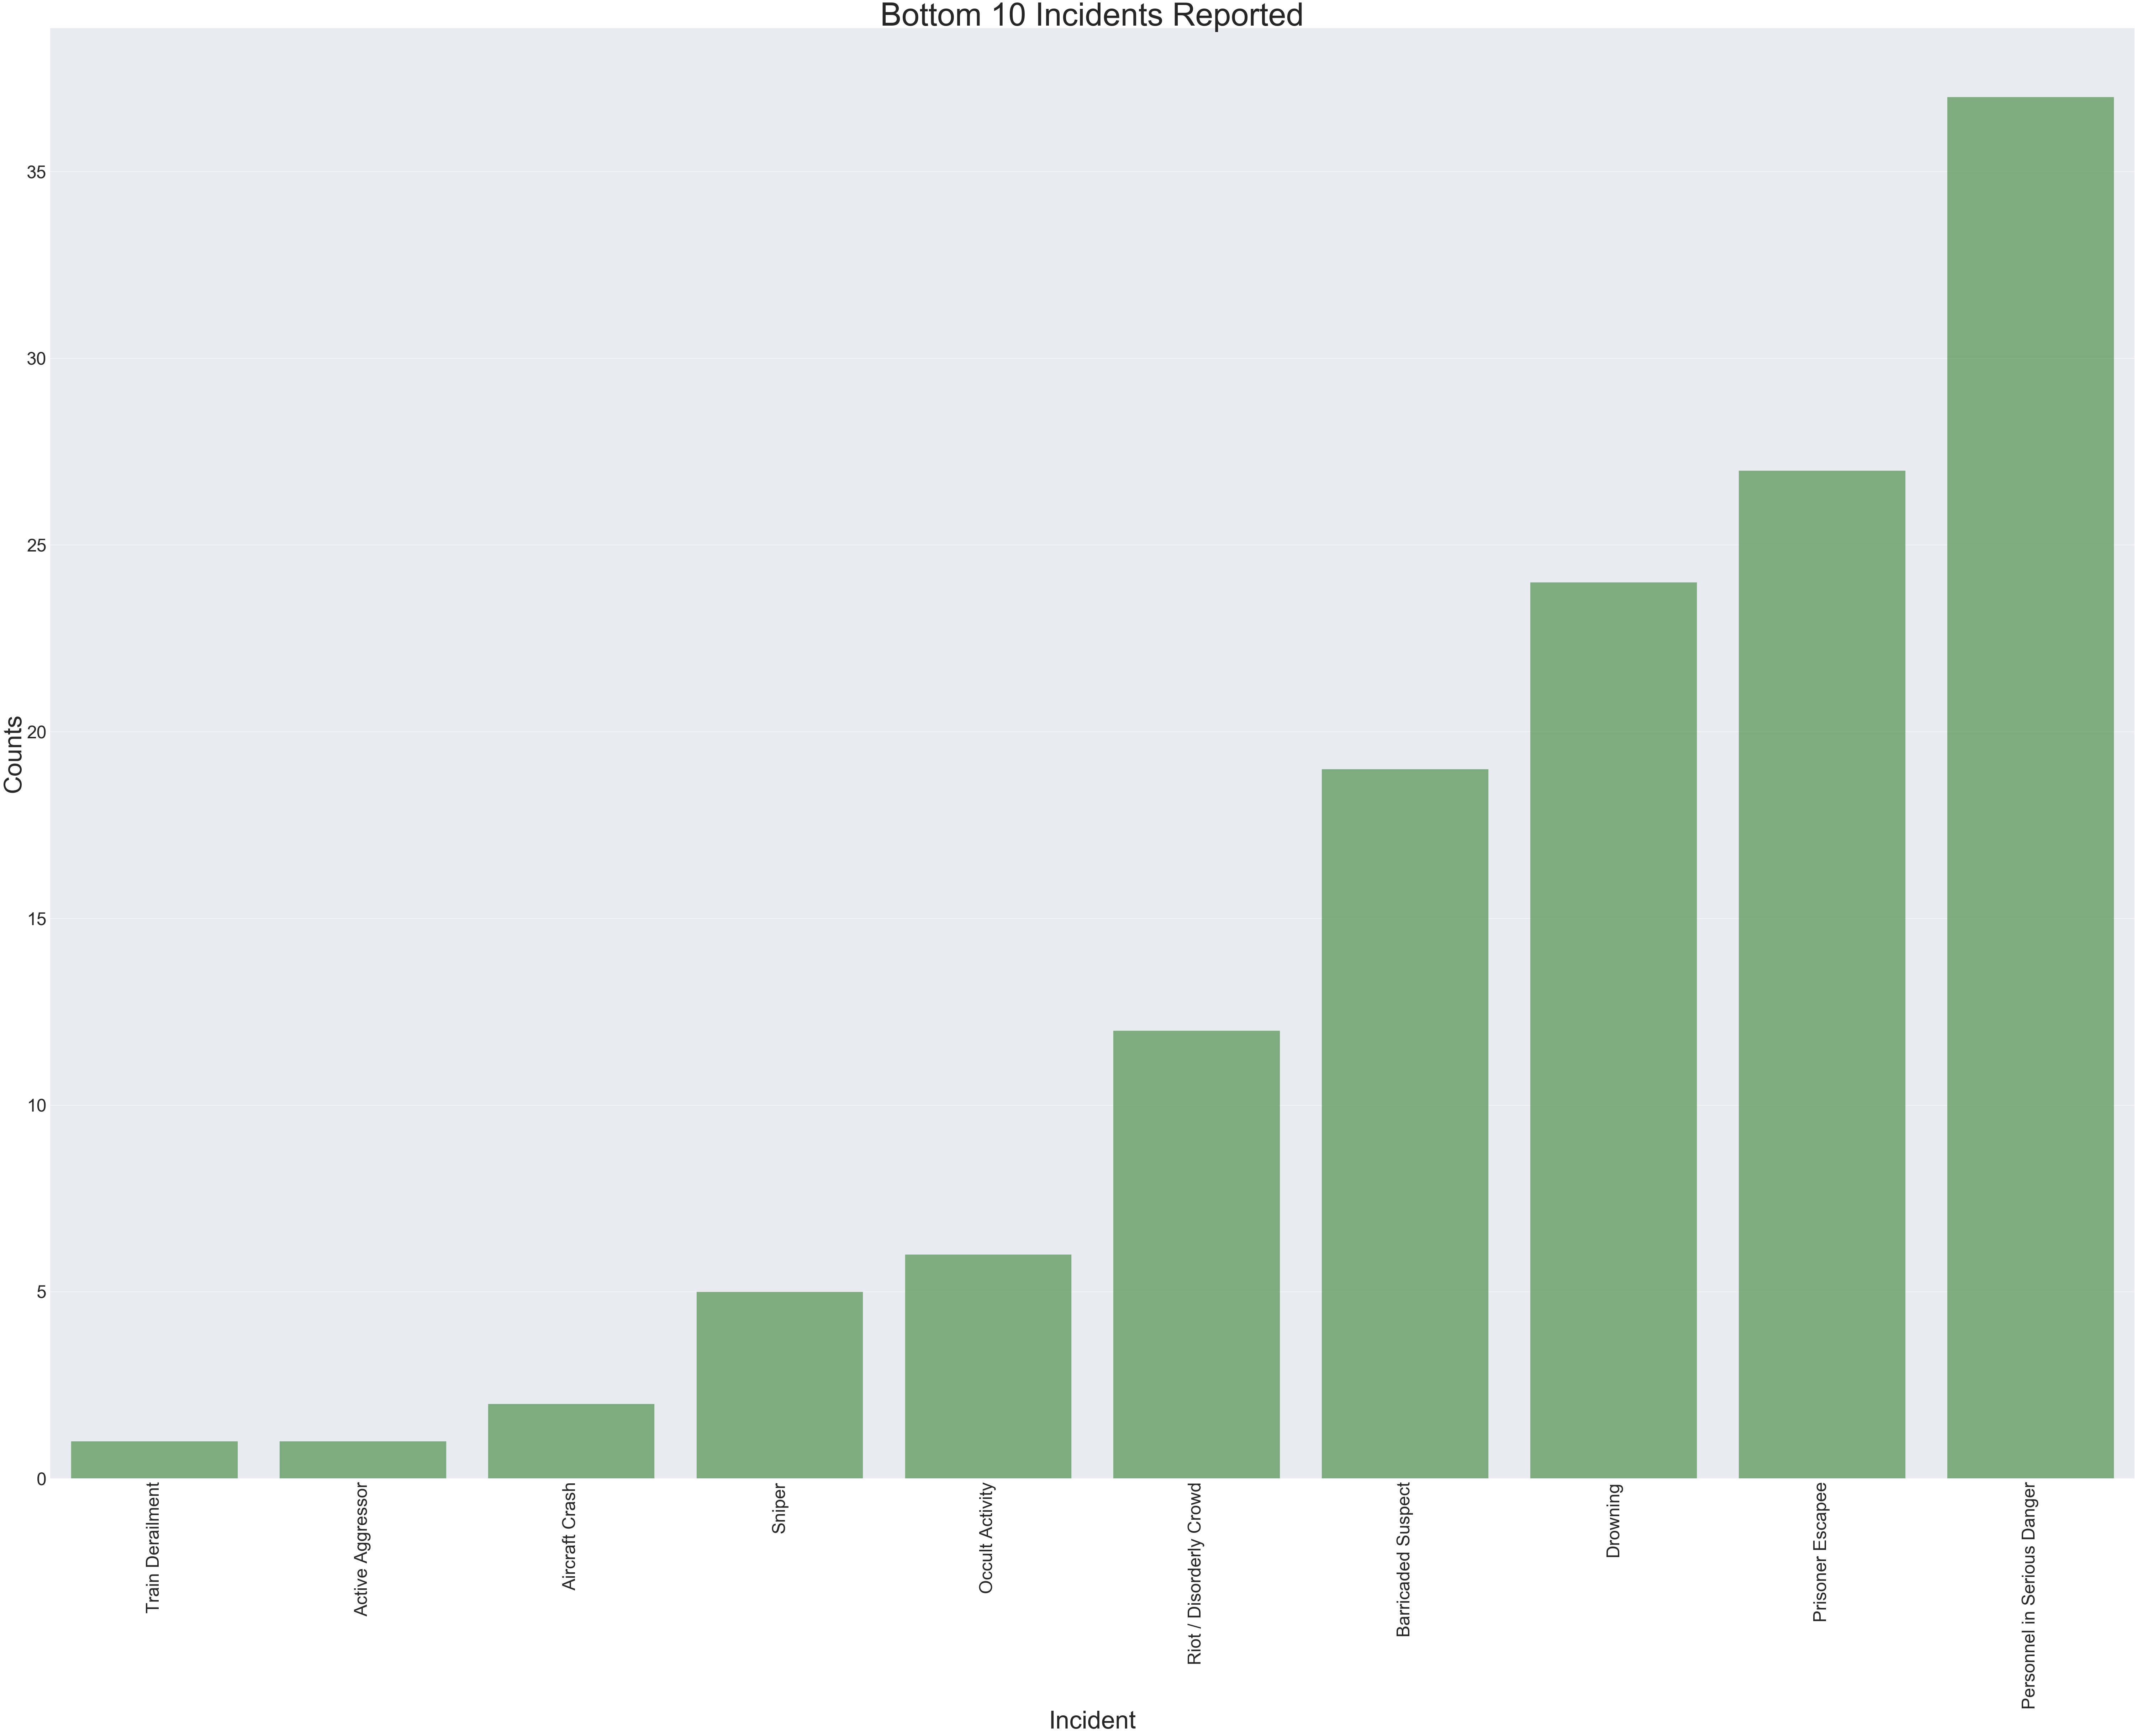

In [25]:

g = sns.barplot(x = "Incident",y = "Count", data = s25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [26]:
# Top Ten Incidents by Month

## Mapping